## Calculating Bollinger Bands

Calculate the Bollinger Bands for the month moving average of its Adjusted Closing price for AAPL.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the Data

In [8]:
df = pd.read_csv(filepath_or_buffer='../TLC-Labs/AAPL.dat', 
                 index_col='Date', parse_dates=True)

Check what has been imported into the DataFrame. There isn't really a right or wrong way to do this, any of the usual options work. It depends on style, personal preference, and the type of data being read in, etc. But, the usual suspects are:

df.tail(), df.head() and df.describe()

In [9]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0


Sort thr data ...

In [10]:
df2 = df.sort_values(by='Date', ascending=True)
df2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


## Calculate the Bollinger Bands for the Adj. Close

- Middle Band = Monthly Moving Average
- Upper Band = Monthly Moving Average + (Monthly Std. Deviation of Price x 2)
- Lower Band = Monthly Moving Average - (Monthly Std. Deviation of Price x 2)

In [11]:
df2['30d mavg'] = df2['AdjClose'].rolling(window=21).mean()
df2['30d std'] = df2['AdjClose'].rolling(window=21).std()
df2['Upper Band'] = df2['30d mavg'] + (df2['30d std'] * 2)
df2['Lower Band'] = df2['30d mavg'] - (df2['30d std'] * 2)

## Plot the Results

Use the matplotlib defaults and plot the entire series of data.

<AxesSubplot:xlabel='Date'>

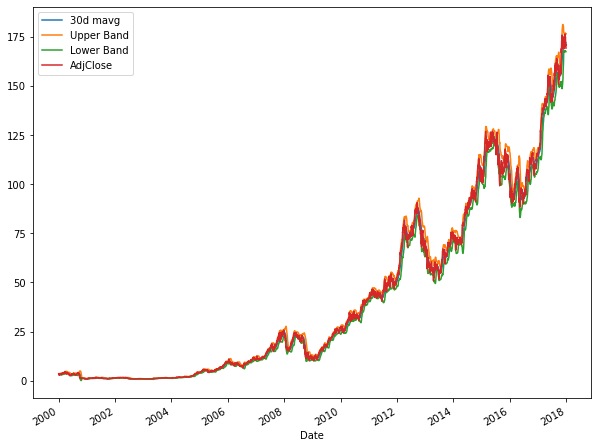

In [12]:
cols = ['30d mavg', 'Upper Band', 'Lower Band', 'AdjClose']
df2[cols].plot(figsize=(10,8))

Plot the results from the start of 2016 to the end of the series...

<AxesSubplot:xlabel='Date'>

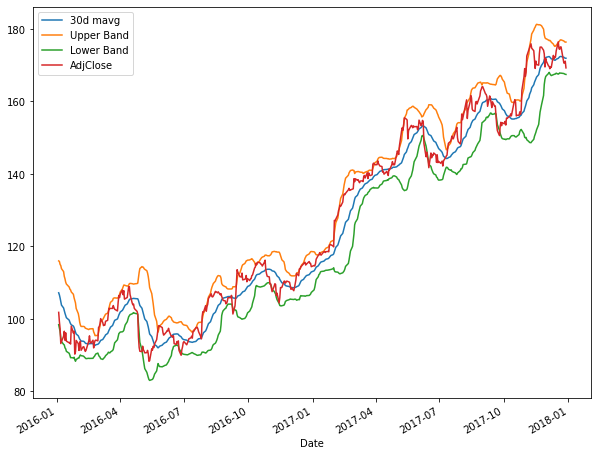

In [13]:
df2['2016':][cols].plot(figsize=(10,8))

## Improve the Presentation

We add in: - 'shading' in the regions between the upper and lower bands. - a title and some labels The important parts of the code are:

- style - fivethirtyeight
- figsize = dimensions of the plot in inches. This is an approximation for computer screens but is more accurate for printing plots. 
- fill_between - shares in areas between 2 lines.

No handles with labels found to put in legend.


[]

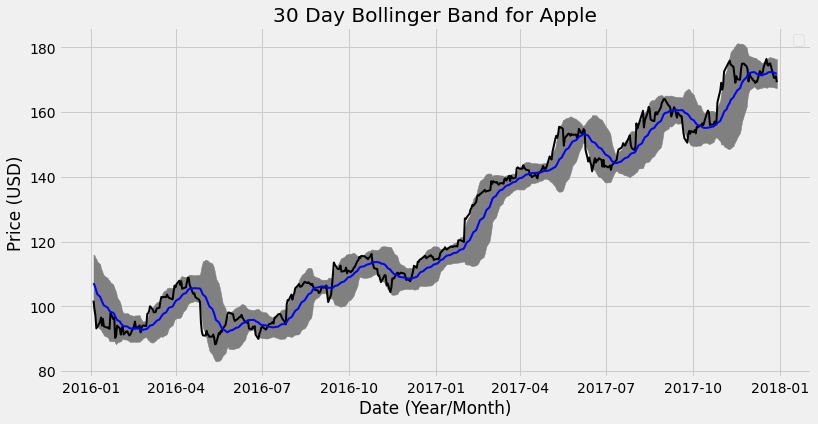

In [14]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

x_axis = df2['2016':].index.get_level_values(0)

ax.fill_between(x_axis, df2['2016':]['Upper Band'], 
                df2['2016':]['Lower Band'], color='grey')

ax.plot(x_axis, df2['2016':]['AdjClose'],  color='black', lw=2)
ax.plot(x_axis, df2['2016':]['30d mavg'], color='blue', lw=2)

ax.set_title('30 Day Bollinger Band for Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price (USD)')
ax.legend()
ax.plot()

## Make the code reusable!

Whatever your software engineering experience or level, making these snippets of code re-usable is going to save you time, frustration and bugs in the future.  So, move everything we've done into a re-usable, customizable function...

In [15]:
def plotBollBand(file, securityName, attribute = 'AdjClose', 
                 window=21, start=None, end=None):
    
    df = pd.read_csv(filepath_or_buffer = file, index_col = 'Date', 
                     parse_dates=True)
    df = df.sort_values(by='Date', ascending=True)
    
    
    mavgCol = str(window) + 'd mvag'
    stdCol = str(window) + 'd std'
    
    df[mavgCol] = df[attribute].rolling(window=window).mean()
    df[stdCol] = df[attribute].rolling(window=window).std()
    df['Upper Band'] = df[mavgCol] + (df[stdCol] * 2)
    df['Lower Band'] = df[mavgCol] - (df[stdCol] * 2)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    
    x_axis = df[start:end].index.get_level_values(0)
    ax.fill_between(x_axis, df[start:end]['Upper Band'], 
                            df[start:end]['Lower Band'], color='grey')
    
    ax.plot(x_axis, df[start:end][attribute], color='black', lw=2)
    ax.plot(x_axis, df[start:end][mavgCol], color='blue', lw=2)
    
    title = str(window) + ' Day Bollinger Band For ' + securityName
    ax.set_title(title)
    ax.set_xlabel('Date  (Year/Month)')
    ax.set_ylabel('Price (USD)')
    plt.show()

... and then first, test with Google

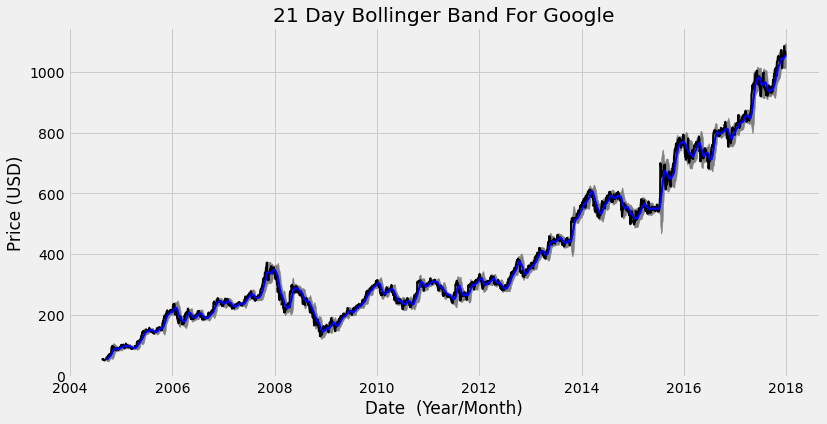

In [17]:
plotBollBand(file='../TLC-Labs/GOOGL.dat', securityName='Google')

.... then do the same with IBM

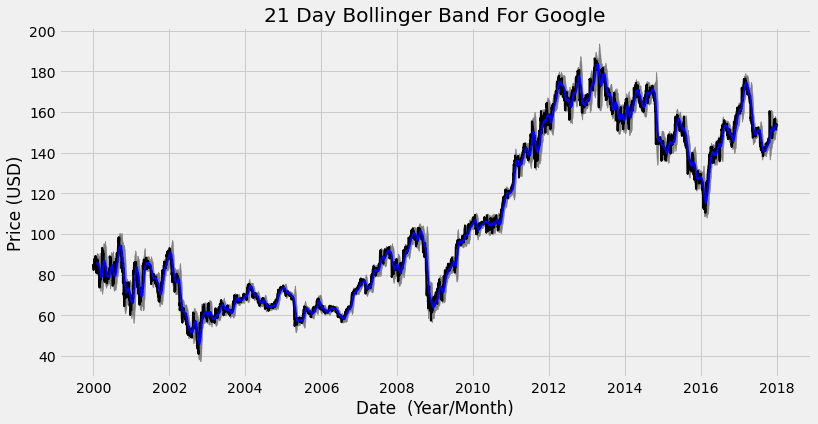

In [19]:
plotBollBand(file='../TLC-Labs/IBM.dat', securityName='Google')

... and, test the other features too. Here we have Facebook, plotting AdjVolume rather than close, over a 42 day rolling window.

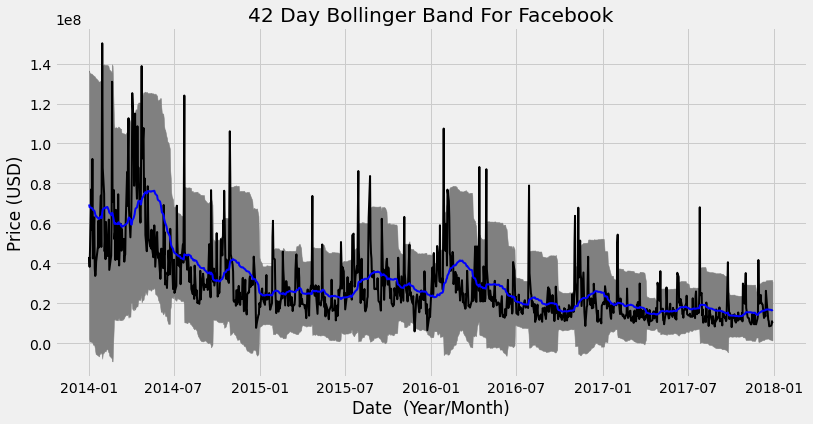

In [20]:
plotBollBand(file='../TLC-Labs/FB.dat', securityName='Facebook', 
             start='2014', window=42, attribute='AdjVolume')